In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


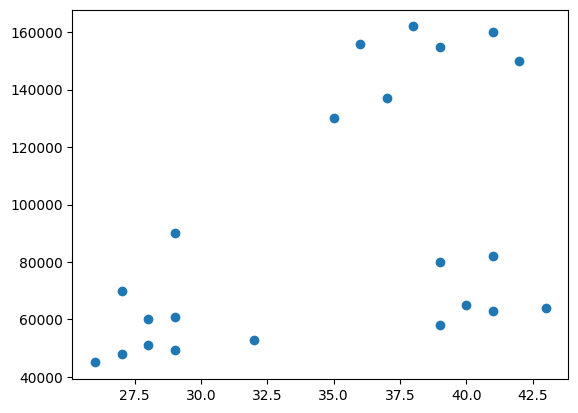

In [36]:
plt.scatter(df['Age'],df['Income($)'])

In [37]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [38]:
y_predicted = km.fit_predict(df[['Age','Income($)']])

In [39]:
df['cluster'] = y_predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


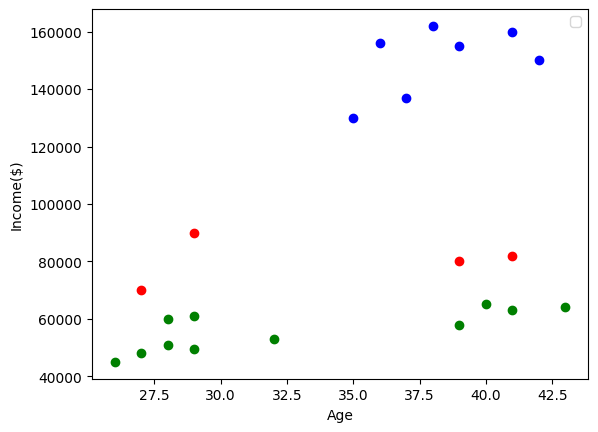

In [40]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
## problem apperad as the scale of age and income are high

# solve the problem of Scaling

In [41]:
scaler = MinMaxScaler()

In [42]:
scaler.fit(df[["Income($)"]])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [46]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

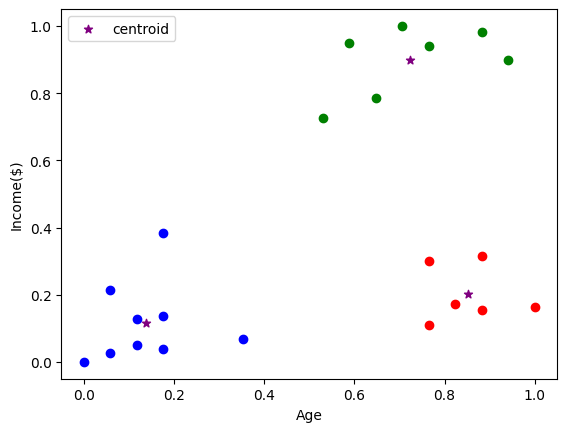

In [49]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_predicted

df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [52]:
# elbow plot method
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

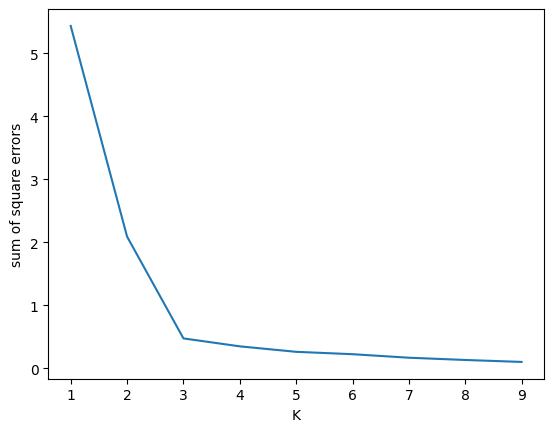

In [53]:
plt.xlabel('K')
plt.ylabel('sum of square errors')
plt.plot(k_rng,sse)